In [76]:
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
mpl.rc('font',family = 'Times New Roman',size=12)
from IPython.display import display,HTML
save_path = r'/Users/nglaser3/Downloads/lab8_deliverables/'
#os.mkdir(save_path)       #this will make the download folder for you, comment this out after you run this once

In [18]:
def deliv1(D0,c,t,r,d):
    '''
    c is array of dosages
    t is thickness array
    r is radius of detector
    d is distance from source to detector
    '''
    y = c/D0
    y = np.log(d**2/r**2*y)
    m,b,r,p,stddev = sp.stats.linregress(t,y)
    return y, np.around(m,5),np.around(b,5)


       ---------------------Deliverable One---------------------


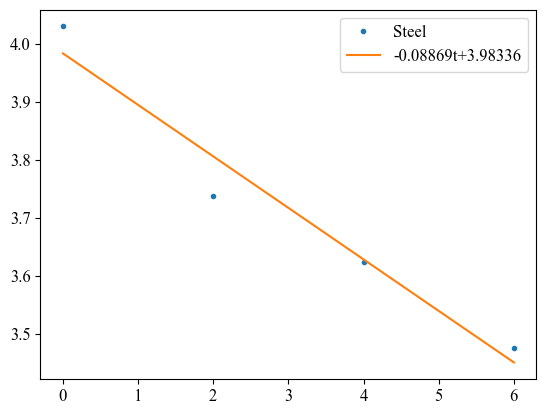

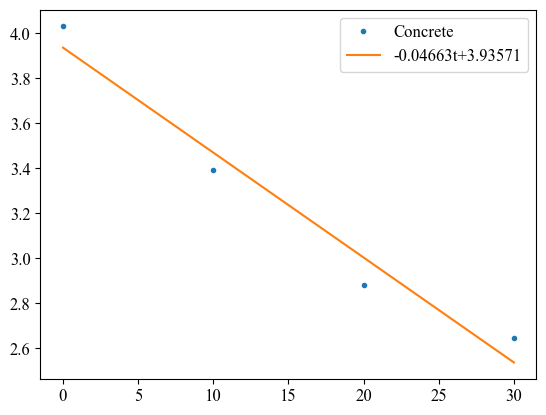

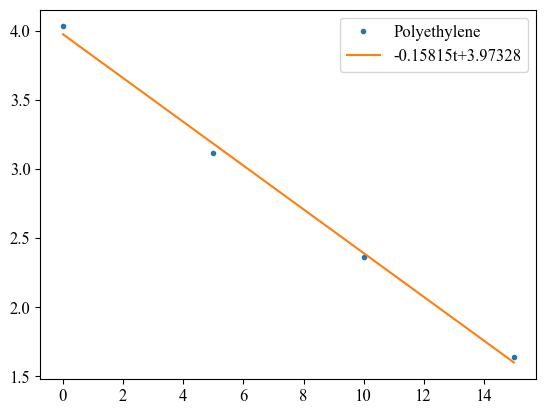

,$Steel$,$Concrete$,$Polyethylene$
$\Sigma_r$ $cm^{-1}$,0.08869,0.04663,0.15815





       ---------------------Deliverable Two---------------------


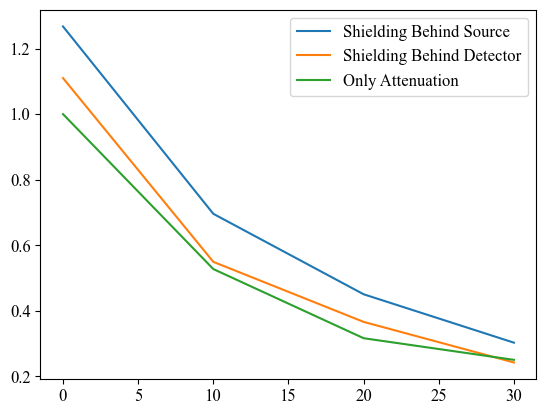




       --------------------Deliverable Three--------------------


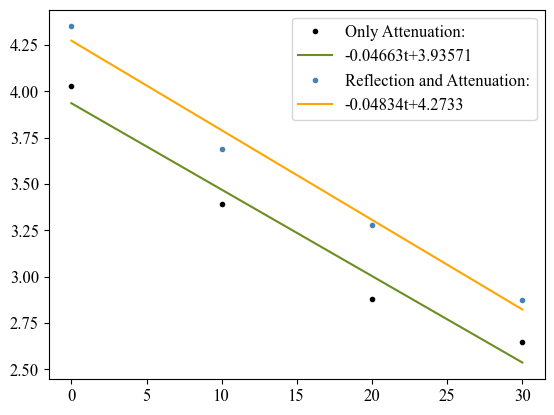

In [77]:
#deliverable 1
print('       ---------------------Deliverable One---------------------')
D0 = 273
dsteel = np.array([273,204,182,157])
dconc = np.array([273,144,86.4,68.4])
dplas = np.array([273,109,51.6,25.1])
tsteel = np.array([0,1,2,3])*2
tconc = np.array([0,1,2,3])*10
tplas = np.array([0,1,2,3])*5
r,d = 10 , 75 
stey,stesr,steb = deliv1(D0,dsteel,tsteel,r,d)
cony,consr,conb = deliv1(D0,dconc,tconc,r,d)
play,plasr,plab = deliv1(D0,dplas,tplas,r,d)
plt.plot(tsteel,stey,'.',label = 'Steel')
plt.plot(tsteel,steb+tsteel*stesr,label = '{}t+{}'.format(stesr,steb))
plt.legend()
plt.savefig(save_path+'d1steel.png',dpi = 600)
plt.show()
plt.plot(tconc,cony,'.',label = 'Concrete')
plt.plot(tconc,conb+tconc*consr,label = '{}t+{}'.format(consr,conb))
plt.legend()
plt.savefig(save_path+'d1conc.png',dpi = 600)
plt.show()
plt.plot(tplas,play,'.',label = 'Polyethylene')
plt.plot(tplas,plab+tplas*plasr,label = '{}t+{}'.format(plasr,plab))
plt.legend()
plt.savefig(save_path+'d1plas.png',dpi = 600)
plt.show()
d1df = pd.DataFrame(np.array([-stesr,-consr,-plasr])).T
d1df.columns = ['$Steel$','$Concrete$','$Polyethylene$']
d1df.index = ['$\Sigma_r$    $cm^{-1}$']
display(HTML(d1df.to_html()))


print('')
print('')
print('')
print('       ---------------------Deliverable Two---------------------')
de3a = np.array([346,190,123,82.7])
de3c = np.array([303,150,100,66.2])
te3a = np.array([0,1,2,3])*10
te3c = te3a
de3a /= D0
de3c /= D0
plt.plot(te3a,de3a,label = 'Shielding Behind Source')
plt.plot(te3c,de3c,label = 'Shielding Behind Detector')
plt.plot(tconc,dconc/D0, label = 'Only Attenuation')
plt.legend()
plt.savefig(save_path+'d2.png',dpi = 600)
plt.show()


print('')
print('')
print('')
print('       --------------------Deliverable Three--------------------')
de3b = np.array([376,194,129,86])
e3by, e3bsr, e3bb = deliv1(D0,de3b,tconc,r,d)
plt.plot(tconc,cony,'.',color = 'k',label = 'Only Attenuation:')
plt.plot(tconc,conb+tconc*consr,color ='olivedrab',label = '{}t+{}'.format(consr,conb))
plt.plot(tconc,e3by,'.',color = 'steelblue',label = 'Reflection and Attenuation:')
plt.plot(tconc,e3bb+e3bsr*tconc,color = 'orange', label = '{}t+{}'.format(e3bsr,e3bb))
plt.legend()
plt.savefig(save_path+'d3.png',dpi = 600)
plt.show()